In [1]:
# update FastAI and set up colab environment
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    177      0  0:00:01  0:00:01 --:--:--   177
Updating fastai...
Done.


In [5]:
# set the directories where files are stored
root_dir = "drive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [4]:
from fastai.vision import *

In [10]:
folder = 'camp_nou'
file = 'camp_nou.csv'

In [11]:
folder = 'santiago_bernabeu'
file = 'santiago_bernabeu.csv'

In [8]:
path = Path(base_dir+'data/stadiums')

# to download data from csv files, uncomment the bottom lines
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('drive/My Drive/fastai-v3/data/stadiums/camp_nou'),
 PosixPath('drive/My Drive/fastai-v3/data/stadiums/camp_nou.csv'),
 PosixPath('drive/My Drive/fastai-v3/data/stadiums/santiago_bernabeu.csv'),
 PosixPath('drive/My Drive/fastai-v3/data/stadiums/santiago_bernabeu')]

In [ ]:
classes = ['camp nou', 'santiago bernabeu']

In [ ]:
download_images(path/file, dest, max_pics = 100)

In [ ]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

camp nou
santiago bernabeu


In [ ]:
np.random.seed(23)

# creates a dataset using the DataBunch function
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['camp_nou', 'santiago_bernabeu']

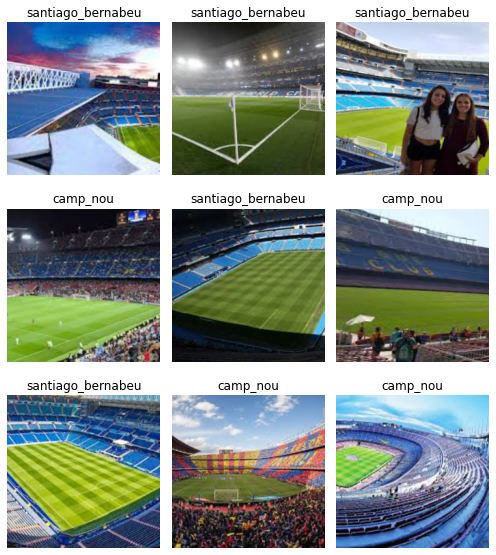

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
# create a resnet 34 model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# fit one cycle 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.363899,4.058010,0.450000,00:05
1,1.338969,2.694992,0.450000,00:03
2,1.063031,1.844280,0.300000,00:03
3,0.924040,1.134023,0.275000,00:03
4,0.801367,0.834352,0.200000,00:03
5,0.678244,0.677814,0.175000,00:03
6,0.609631,0.590834,0.125000,00:03
7,0.547659,0.555397,0.125000,00:03


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

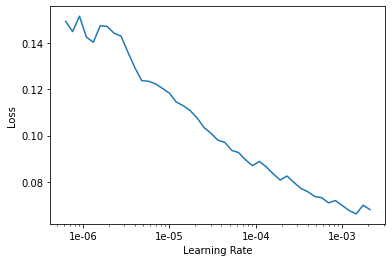

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-05, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.100781,0.425670,0.125000,00:03
1,0.104324,0.353972,0.100000,00:03
2,0.107303,0.336927,0.100000,00:03


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
camp_nou,camp_nou,camp_nou,camp_nou,camp_nou
Path: drive/My Drive/fastai-v3/data/stadiums;

Valid: LabelList (40 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
camp_nou,camp_nou,santiago_bernabeu,camp_nou,camp_nou
Path: drive/My Drive/fastai-v3/data/stadiums;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1),

In [ ]:
# create an interpreter to analyze the mistakes made by the model
interp = ClassificationInterpretation.from_learner(learn)

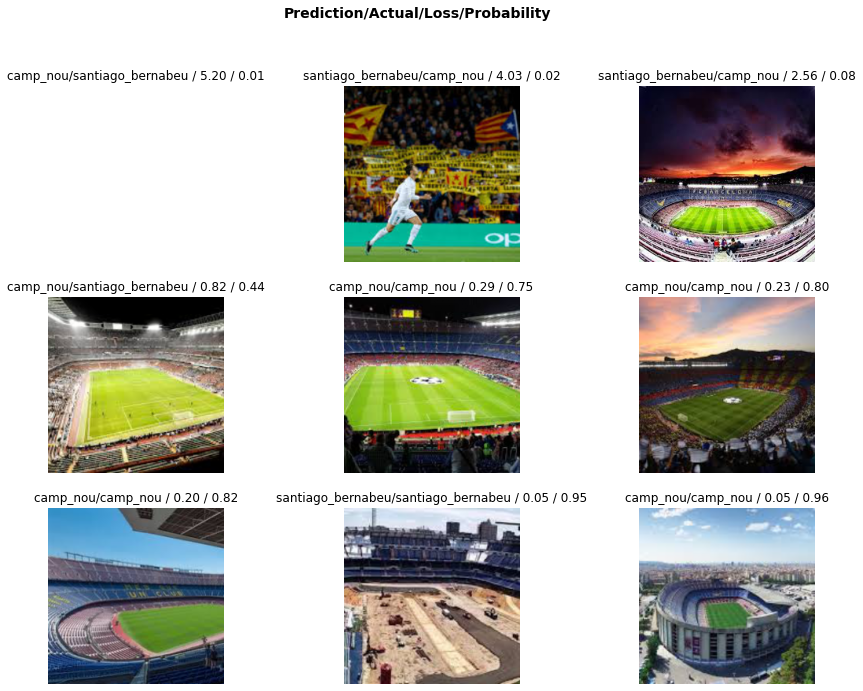

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

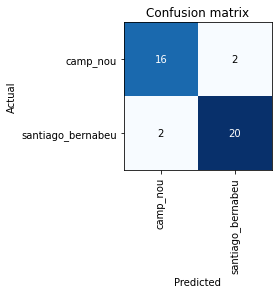

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics = error_rate)
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
camp_nou,camp_nou,camp_nou,camp_nou,camp_nou
Path: drive/My Drive/fastai-v3/data/stadiums;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: drive/My Drive/fastai-v3/data/stadiums;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (c

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

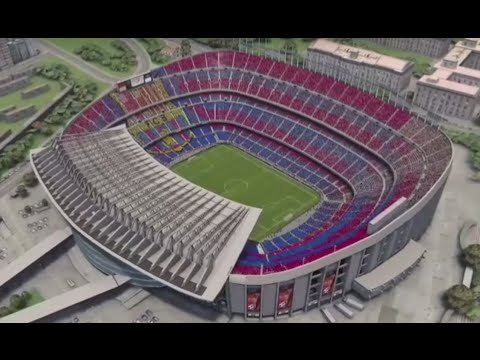

In [12]:
img = open_image(path/'camp_nou'/'nou_fifa.jpg')
img

In [13]:
learn = load_learner(path)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [14]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'camp_nou'